<H1><font color=#B22222>Make sure this runs with Python 2 kernel.  </font></H1><br>
To change select `Kernel` --> `Change Kernel` --> `Python 2` from the toolbar above if `Python 3` shows in the upper-right corner of this page.

Note that while the circle on the upper-right of this page is **filled**, the kernel is busy and interactive graphs will not respond.

#Make a new `flotilla.Study`
<br>
`flotilla.Study` objects are the main "user-interface" for `flotilla` data and features
<br>


In [2]:
import css_styling

##Requirements for this demonstration.
<br>
  * Hardware<br><br>
    * Lots of RAM (sorry, working on this)
  <br>
  <br>
  <br>  
  * Metrics<br><br>
  
    * Mapping statistics data table<br>
   Combined output from aligner, quantifying number of reads mapped in each sample
    <br>
    <br>
    * Expression data table<br>
    [Gencode](http://www.gencodegenes.org/) gene IDs
    <br>
    <br>
    * Splicing data table<br>[MISO](http://miso.readthedocs.org/) qunatification and ids
  <br>
  <br>
  <br>
  * User-defined items in metadata (will create these).
    <br>
    <br>
    * Sample Colors
    <br>
    <br>
    * Pooled samples vs single cells labels
    <br>
    <br>
    * A _phenotype_ attribute.        
  <br>
  <br>
  * Skills
  <br>
  <br>
    * Basic knowloedge of programming and the Jupyter notebook interface

We assume you already have a pipeline in place to analyze and quantify data. If you don't the pipeline is available on the `docker` image. While it is possible to create custom species, that is left for another notebook. Here we assume you have human (hg19/GRCh37) or mouse (mm10/GRCm38) data. 

##Our data
<H2 align='center'>_In vitro_ directed differentiation of fibroblasts with a sequenced genome.</H2>
<br>
<H4><div align='right'><font color=#0066CC> P cells (P) </font> <br>
<font color=#29A329> N cells (N) </font><br>
<font color=#CC0000> M cells (M) </font><br>
<font color=#FF9900> S cells (S) <br> </font></div></H4>

<img src="img/differentiation.png" width=100%>

##Study Setup
<H3 align='center'>Import and Save Data</H3>
<br>
<div align='right'>Use `pandas` package to manipulate on-disk files.<br>Save the data into a `flotilla` 'datapackage.'</div>

In [3]:
import flotilla #automatically calls %matplotlib inline
import pandas
import os
from time import time
import numpy as np


:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
start_time = time()

<div align='left'><H2>Technical data</H2></div>
<H3 align='center'>Mapping statistics.</H3>
<br>
<div align='right'>Output of [RNA-STAR](https://code.google.com/p/rna-star/) genome aligner.</div>

In [5]:
a = time()

In [6]:
mapstats_data_file = "data/mapping_stats.tsv"
mapstats_data = pandas.read_table(mapstats_data_file, index_col=0)
print "Loaded data table, size is (samples, genes):", mapstats_data.shape

Loaded data table, size is (samples, genes): (256, 32)


In [7]:
b = time()

print "This operation took {:.5f} seconds.".format(b - a)

This operation took 0.05006 seconds.


In [8]:
mapstats_data.head()

Started job on Started mapping on      Finished on  \
M_M1_01  Apr 29 19:58:18    Apr 29 19:58:40  Apr 29 20:01:22   
M_M1_02  Apr 29 17:59:28    Apr 29 18:01:21  Apr 29 18:19:15   
M_M1_03  Apr 29 19:35:13    Apr 29 19:35:39  Apr 29 19:39:41   
M_M1_04  Apr 29 18:30:05    Apr 29 18:30:31  Apr 29 18:32:29   
M_M1_05  Apr 29 19:19:31    Apr 29 19:19:53  Apr 29 19:22:28   

         Mapping speed, Million of reads per hour  Number of input reads  \
M_M1_01                                    274.58               12356210   
M_M1_02                                     41.62               12416854   
M_M1_03                                    294.61               19804563   
M_M1_04                                    263.10                8623786   
M_M1_05                                    267.28               11507835   

         Average input read length  Uniquely mapped reads number  \
M_M1_01                        184                      10684874   
M_M1_02                        184                      11235549   
M_M1_03                        184                      17584862   
M_M1_04                        184                       7599917   
M_M1_05                        184                       9726225   

         Uniquely mapped reads %  Average mapped length  \
M_M1_01                    86.47                 181.36   
M_M1_02                    90.49                 181.70   
M_M1_03                    88.79                 181.38   
M_M1_04                    88.13                 181.29   
M_M1_05                    84.52                 181.33   

         Number of splices: Total  Number of splices: Annotated (sjdb)  \
M_M1_01                   4629200                              4559773   
M_M1_02                   2706035                              2656128   
M_M1_03                   8496381                              8409406   
M_M1_04                   4547233                              4501975   
M_M1_05                   3429570                              3371387   

         Number of splices: GT/AG  Number of splices: GC/AG  \
M_M1_01                   4594566                     23888   
M_M1_02                   2679768                     20734   
M_M1_03                   8422815                     53739   
M_M1_04                   4503758                     32611   
M_M1_05                   3391403                     30907   

         Number of splices: AT/AC  Number of splices: Non-canonical  \
M_M1_01                      5051                              5695   
M_M1_02                      2084                              3449   
M_M1_03                      9947                              9880   
M_M1_04                      4811                              6053   
M_M1_05                      4029                              3231   

         Mismatch rate per base, %  Deletion rate per base  \
M_M1_01                       0.37                    0.01   
M_M1_02                       0.38                    0.01   
M_M1_03                       0.38                    0.01   
M_M1_04                       0.36                    0.01   
M_M1_05                       0.37                    0.01   

         Deletion average length  Insertion rate per base  \
M_M1_01                     1.57                     0.01   
M_M1_02                     1.59                     0.01   
M_M1_03                     1.55                     0.01   
M_M1_04                     1.54                     0.01   
M_M1_05                     1.55                     0.01   

         Insertion average length      
M_M1_01                      1.43 ...  
M_M1_02                      1.44 ...  
M_M1_03                      1.50 ...  
M_M1_04                      1.46 ...  
M_M1_05                      1.42 ...  

[5 rows x 32 columns]

##Expression Data

<H3><div align='center'>TPM - Transcripts-per-million.</div></H3>
<div align='right'>
Quantified with <a href='http://www.cs.cmu.edu/~ckingsf/software/sailfish/'>Sailfish</a>
</div>

In [9]:
a = time()

In [10]:
expression_data_file = "data/tpm.tsv"
expression_data = pandas.read_table(expression_data_file, index_col=0)
print "Loaded data table, size is (samples, genes):", expression_data.shape

Loaded data table, size is (samples, genes): (258, 34609)


In [11]:
b = time()

print "This operation took {:.1f} seconds.".format(b - a)

This operation took 9.2 seconds.


In [12]:
expression_data.head()

ENSG00000000003  ENSG00000000005  ENSG00000000419  ENSG00000000457  \
sample_id                                                                       
N_CVN_01          7.035842                0                0         0.257396   
N_CVN_02          0.360025                0                0         5.060763   
N_CVN_03          8.344904                0                0         8.807094   
N_CVN_04          7.369145                0                0         5.023515   
N_CVN_05          5.523840                0                0         5.904447   

           ENSG00000000460  ENSG00000000938  ENSG00000000971  ENSG00000001036  \
sample_id                                                                       
N_CVN_01          0.000000                0         0.000000                0   
N_CVN_02          2.985242                0         0.000000                0   
N_CVN_03          2.891814                0         0.000000                0   
N_CVN_04          0.000000                0         0.000000                0   
N_CVN_05          0.000000                0         3.476259                0   

           ENSG00000001084  ENSG00000001167  ENSG00000001460  ENSG00000001461  \
sample_id                                                                       
N_CVN_01                 0          0.00000                0                0   
N_CVN_02                 0          0.00000                0                0   
N_CVN_03                 0          0.00000                0                0   
N_CVN_04                 0          0.00000                0                0   
N_CVN_05                 0          0.79441                0                0   

           ENSG00000001497  ENSG00000001561  ENSG00000001617  ENSG00000001626  \
sample_id                                                                       
N_CVN_01          0.599996         1.918966         5.483087         0.000000   
N_CVN_02          6.770274         5.731577         2.172771         0.689135   
N_CVN_03          0.542938         1.594176         0.977475         0.000000   
N_CVN_04          0.796629         2.917898         1.322353         0.000000   
N_CVN_05          6.367334         0.161469         2.248476         0.311719   

           ENSG00000001629  ENSG00000001630  ENSG00000001631  ENSG00000002016  \
sample_id                                                                       
N_CVN_01                 0         0.000000        10.489015                0   
N_CVN_02                 0         0.000000        11.501121                0   
N_CVN_03                 0         0.000000        11.673159                0   
N_CVN_04                 0         0.000000        11.365814                0   
N_CVN_05                 0         0.136426        10.198212                0   

               
sample_id      
N_CVN_01  ...  
N_CVN_02  ...  
N_CVN_03  ...  
N_CVN_04  ...  
N_CVN_05  ...  

[5 rows x 34609 columns]

##Splicing Data
<H3 align='center'> $\psi$ - <u>P</u>ercent <u>S</u>pliced <u>I</u>n.</H3><br>
<div align='right'>Quantified with <a href='http://genes.mit.edu/burgelab/miso/'>MISO</a><br>
In this case, we filtered by $\psi$ confidence interval $(CI\_width < 0.5)$.
</div>


In [13]:
a = time()

In [14]:
splicing_data_file = "data/psi.tsv"
splicing_data = pandas.read_table(splicing_data_file, index_col=0)
print "Loaded data table, size is (samples, genes):", expression_data.shape
print "{:.2f}% of values are not NaN".format(100.*splicing_data.count().sum() / np.product(splicing_data.shape))

Loaded data table, size is (samples, genes): (258, 34609)
21.71% of values are not NaN


In [15]:
b = time()

print "This operation took {:.1f} seconds.".format(b - a)

This operation took 48.5 seconds.


In [16]:
splicing_data.head()

AFE100093631@uc003txp.1@uc003ubw.1  \
sample_id                                       
N_CVN_01                                  NaN   
N_CVN_02                                  NaN   
N_CVN_03                                  NaN   
N_CVN_04                                  NaN   
N_CVN_05                                  NaN   

           AFE100101467@uc002kyl.2@uc002kym.1  \
sample_id                                       
N_CVN_01                                 0.37   
N_CVN_02                                  NaN   
N_CVN_03                                  NaN   
N_CVN_04                                 0.43   
N_CVN_05                                 0.09   

           AFE100101467@uc002kyl.2@uc002kyn.1  AFE10011@uc003lfz.1@uc003lga.1  \
sample_id                                                                       
N_CVN_01                                  NaN                             NaN   
N_CVN_02                                  NaN                             NaN   
N_CVN_03                                  NaN                             NaN   
N_CVN_04                                  NaN                            0.03   
N_CVN_05                                  NaN                             NaN   

           AFE100128553@uc010lpe.1@uc010lpc.1  \
sample_id                                       
N_CVN_01                                 0.32   
N_CVN_02                                 0.34   
N_CVN_03                                  NaN   
N_CVN_04                                  NaN   
N_CVN_05                                 0.05   

           AFE100129405@uc009wrf.1@uc001flw.2  \
sample_id                                       
N_CVN_01                                  NaN   
N_CVN_02                                  NaN   
N_CVN_03                                  NaN   
N_CVN_04                                  NaN   
N_CVN_05                                  NaN   

           AFE100129405@uc009wrf.1@uc009wre.1  \
sample_id                                       
N_CVN_01                                  NaN   
N_CVN_02                                  NaN   
N_CVN_03                                  NaN   
N_CVN_04                                  NaN   
N_CVN_05                                  NaN   

           AFE100129583@uc003hjw.1uc010ijf.1@uc003hjv.1  \
sample_id                                                 
N_CVN_01                                            NaN   
N_CVN_02                                            NaN   
N_CVN_03                                            NaN   
N_CVN_04                                            NaN   
N_CVN_05                                            NaN   

           AFE100129583@uc003hjx.1uc003hjy.1@uc003hjv.1  \
sample_id                                                 
N_CVN_01                                            NaN   
N_CVN_02                                            NaN   
N_CVN_03                                            NaN   
N_CVN_04                                            NaN   
N_CVN_05                                            NaN   

           AFE100130742@uc003yew.1@uc010mal.1uc003yev.1  \
sample_id                                                 
N_CVN_01                                            NaN   
N_CVN_02                                            NaN   
N_CVN_03                                            NaN   
N_CVN_04                                           0.49   
N_CVN_05                                            NaN   

           AFE100132247@uc010bxi.1@uc010bxg.1  \
sample_id                                       
N_CVN_01                                  NaN   
N_CVN_02                                  NaN   
N_CVN_03                                  NaN   
N_CVN_04                                  NaN   
N_CVN_05                                  NaN   

           AFE100132247@uc010bxi.1@uc010bxh.1  \
sample_id                                       
N_CVN_01                               

##Metadata
<marker id="metadata"/>
<H3 align='center'> Data about data. </H3>
<br>
<div align='right'>This takes a few minutes the first time,<br> but will never need to be done again.</div>

###Identify pooled (> 1 cell) samples

In [17]:
metadata = pandas.DataFrame(index = expression_data.index & splicing_data.index)

metadata['pooled_samples'] = False

metadata['pooled_samples'].ix[['P_M2nd_33', 'P_M2nd_34', 
                               'N_CVN_17', 'N_CVN_35',
                               'M_M2_05', 'M_M2nd_13', 'M_M2nd_21', 
                               'S_MSA_19', 'S_MSA_29']] = True

###Set sample "phenotype." <br>

In this case, the phenotype is encoded in the first letter of the sample label.

In [18]:
metadata['phenotype'] = [x[0] for x in metadata.index]


###Get some help to choose pleasing colors.

[`Set1`](http://matplotlib.org/examples/color/colormaps_reference.html) is my favoriate color palette.

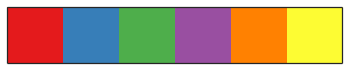

In [19]:
import seaborn
import matplotlib as mpl
palette = map(mpl.colors.rgb2hex, seaborn.color_palette('Set1'))
seaborn.palplot(palette)

###Assign colors to phenotypes.

In [20]:
color_map = {'P': palette[1], # blue
             'N': palette[2], # green
             'M': palette[0], # red
             'S': palette[4]} # orange

###Create boolean columns for each phenotype.
...this will be useful later.

In [21]:
for phenotype in ['P', 'N', 'M', 'S']:
    metadata[phenotype + '_cell'] = metadata['phenotype'] == phenotype

###Assemble data into a <code>flotilla.Study</code> object

In [22]:
a = time()

In [23]:
study = flotilla.Study(#study metadata
                       sample_metadata=metadata,
                       #a version for this study, to track changes
                       version='0.1.0',
                       #pandas.DataFrame with expression data, created above
                       expression_data=expression_data, 
                       #column in study.expression.feature_data to map ensg id to symbols
                       #(default feature_data is in flotilla_packages/<species>)
                       expression_feature_rename_col='gene_name',
                       #pandas.DataFrame with splicing data, created above
                       splicing_data=splicing_data,
                       #column in study.splicing.feature_data to map ensg id to symbols 
                       #(default feature_data is in flotilla_packages/<species>)
                       splicing_feature_rename_col='gene_name',
                       #pandas.DataFrame with mapping statistics, created above
                       mapping_stats_data=mapstats_data,
                       #column with number of mapped reads
                       mapping_stats_number_mapped_col='Uniquely mapped reads number',
                       #specify species
                       species='hg19',
                       #specify which column of metadata holds phenotype information
                       metadata_phenotype_col ='phenotype',
                       #specify a dictionary mapping phenotype to colors
                       metadata_phenotype_to_color=color_map,
                       #specify the order which you would like samples to be plotted:
                       metadata_phenotype_order=["P", "N", "M", "S"],
                       #specify a column that indicates whether a sample is pooled or single-cell
                       metadata_pooled_col='pooled_samples',
                      )

2015-01-11 12:16:49	Initializing Study
2015-01-11 12:16:49	Initializing Predictor configuration manager for Study
2015-01-11 12:16:49	Predictor ExtraTreesClassifier is of type <class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
2015-01-11 12:16:49	Added ExtraTreesClassifier to default predictors
2015-01-11 12:16:49	Predictor ExtraTreesRegressor is of type <class 'sklearn.ensemble.forest.ExtraTreesRegressor'>
2015-01-11 12:16:49	Added ExtraTreesRegressor to default predictors
2015-01-11 12:16:49	Predictor GradientBoostingClassifier is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
2015-01-11 12:16:49	Added GradientBoostingClassifier to default predictors
2015-01-11 12:16:49	Predictor GradientBoostingRegressor is of type <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>
2015-01-11 12:16:49	Added GradientBoostingRegressor to default predictors
2015-01-11 12:16:49	Loading metadata
2015-01-11 12:16:49	Loading species metadata from ~/f

No phenotype to marker (matplotlib plotting symbol) was provided, so each phenotype will be plotted as a circle in visualizations.
Samples had too few mapped reads (<5.0e+05 reads):
	M_M2nd_23, M_M2nd_30, M_M2nd_31, M_M2nd_32, M_M3_10, P_P4_2, P_P8_12, P_P8_3, P_P8_4, P_P8_7, P_P8_8, P_P8_9, S_MSA_25
Error loading species hg19 data 

2015-01-11 12:16:54	Loading expression data
2015-01-11 12:16:54	Initializing expression
2015-01-11 12:16:54	Done initializing expression


Removing technical outliers from consideration in expression:
	M_M2nd_23, M_M2nd_30, M_M2nd_31, M_M2nd_32, M_M3_10, P_P4_2, P_P8_12, P_P8_3, P_P8_4, P_P8_7, P_P8_8, P_P8_9, S_MSA_25
Removing technical outliers from consideration in splicing:
	M_M2nd_23, M_M2nd_30, M_M2nd_31, M_M2nd_32, M_M3_10, P_P4_2, P_P8_12, P_P8_3, P_P8_4, P_P8_7, P_P8_8, P_P8_9, S_MSA_25


2015-01-11 12:16:56	Loading splicing data
2015-01-11 12:16:56	Initializing splicing
2015-01-11 12:16:57	Done initializing splicing
2015-01-11 12:16:57	Successfully initialized a Study object!


In [24]:
b = time()
print "This operation took {:.1f} seconds.".format(b - a)

This operation took 7.9 seconds.


In [26]:
b = time()
print "This operation took {:.1f} seconds.".format(b - a)

This operation took 127.6 seconds.


In [27]:
finish_time = time()
total_time = finish_time - start_time

In [28]:
print "This notebook took {:.1f} seconds to run.".format(total_time)

This notebook took 186.0 seconds to run.


##Explore variation in samples with principal component analysis (PCA)


##The following functions are introduced:
<br>

  * `study.plot_pca` and `study.interactive_pca`<br>
     These funcitons perform [Principal Component Ananlysis](http://scikit-learn.org/stable/modules/decomposition.html) on user-selected subsets of samples and features. Samples are colored according to a dictionary saved in the [Create A New Study](1_Create%20A%20New%20Study.ipynb#metadata) notebook.<br><br>

  * `study.drop_outliers`<br>
     After setting the `outlier` attribute in `study.metadata.data`, the samples labelled outliers are removed from `study.expression.data` and `study.splicing.data`<br><br>
  
  * `study.plot_gene` and `study.plot_event`<br>
     These plot the distribution of a particular gene expression (TPM) or splicing ($\psi$) feature in each phenotype.<br><br>
  
  * `study.merge_boolean_metadata_columns` takes mulitiple boolean (True/False) columns and returns the logical OR of these columns.<br><br>

##Dimensionality reduction is a useful tool to interpret the sources of variation in data.

/usr/local/lib/python2.7/dist-packages/flotilla/data_model/metadata.py:186: UserWarning: MetaData.phenotype_series will be deprecated in 0.3.0
  warnings.warn('MetaData.phenotype_series will be deprecated in 0.3.0')
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['Helvetica', 'Arial'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


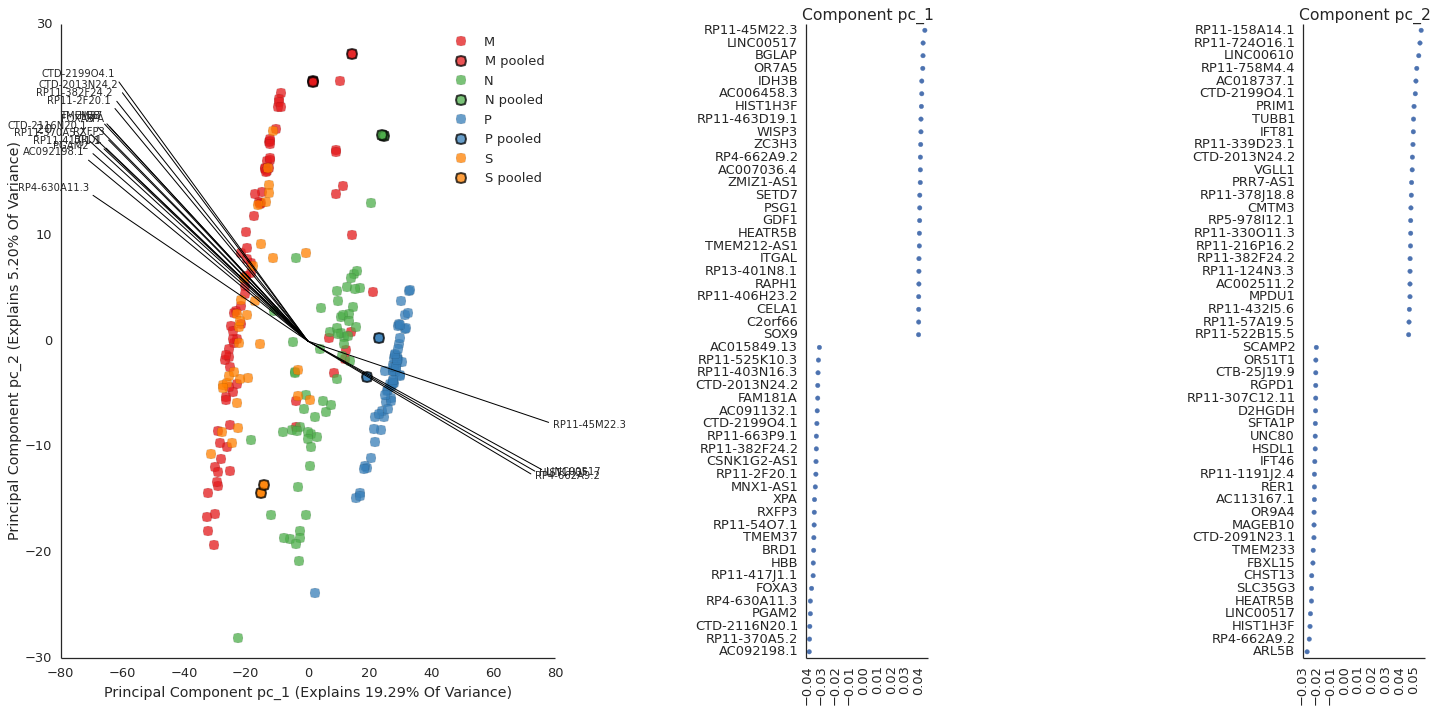

In [32]:
study.plot_pca(data_type='expression')

##Evaluate a single gene's expression distribution.
<a name="checkgene"></a>

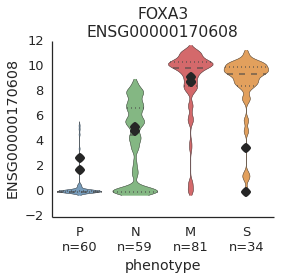

In [33]:
study.plot_gene("FOXA3")

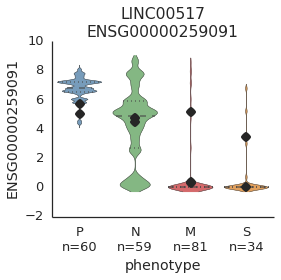

In [34]:
study.plot_gene("LINC00517")

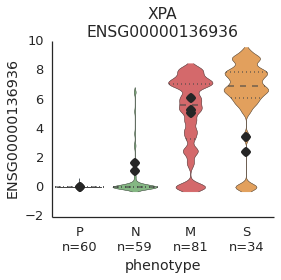

In [35]:
study.plot_gene("XPA")

##Interactive PCA
###Choose feature type, sample subset, and feature subsets to perform PCA.
By default, the most variant features among the samples selected are used to perform PCA.

<a name="interact"></a>
###HTML widgets allow user interaction:
<img align='center' src="img/interactive_pca_widgets.png" align='center'/><br><br><br>

Alternatively (_for presentations like this for example_) users can set the range of options at the function call.

###`interactive_pca` options:
  <br>
  * Select `data_type` (expression/splicing), `sample_subset`, `feature_subset` from pull-down menus.
  <br>
  <br>
  * Transpose with _featurewise_ to examine relationships between features
  <br>
  <br>
  * Use custom lists from the internet _(Dropbox?)_ or local file paths with `list_link` and the _custom_ feature subset.
  <br>
  <br>
  * Choose other principal components to plot with sliders.
  <br>
  <br>
  * Plot violin plots with `plot_violins`
  <br>
  <br>
  * Label samples
  

###`sample_subsets` include:
  <br>
  * All boolean columns in `study.metadata.data`
  <br>
  <br>
  * Phenotypes
  <br>
  <br>
  * Pooled samples
  <br>
  <br>
  * Outliers

###`feature_subset`s include:
 * Everything annotated in Gencode
  <br>
  <br>
   * Protein coding genes
  <br>
  <br>     
   * lncRNA/snoRNA/snRNA/tRNA...
  <br>
  <br>     
   * Pseudogenes

  <br>
  <br>     

 * And some things that are not
  <br>
  <br>     
   * RNA-binding proteins
  <br>
  <br>     
   * Neural celltype lineage markers from (Fluidigm) biomark panel.
  <br>
  <br>     
   * Transcription factors

featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 2.0
most_variant_features : False
show_point_labels : True
plot_violins : False
sample_subset : all_samples
feature_subset : variant
bokeh : False
color_samples_by : phenotype
x_pc : 1
list_link : 


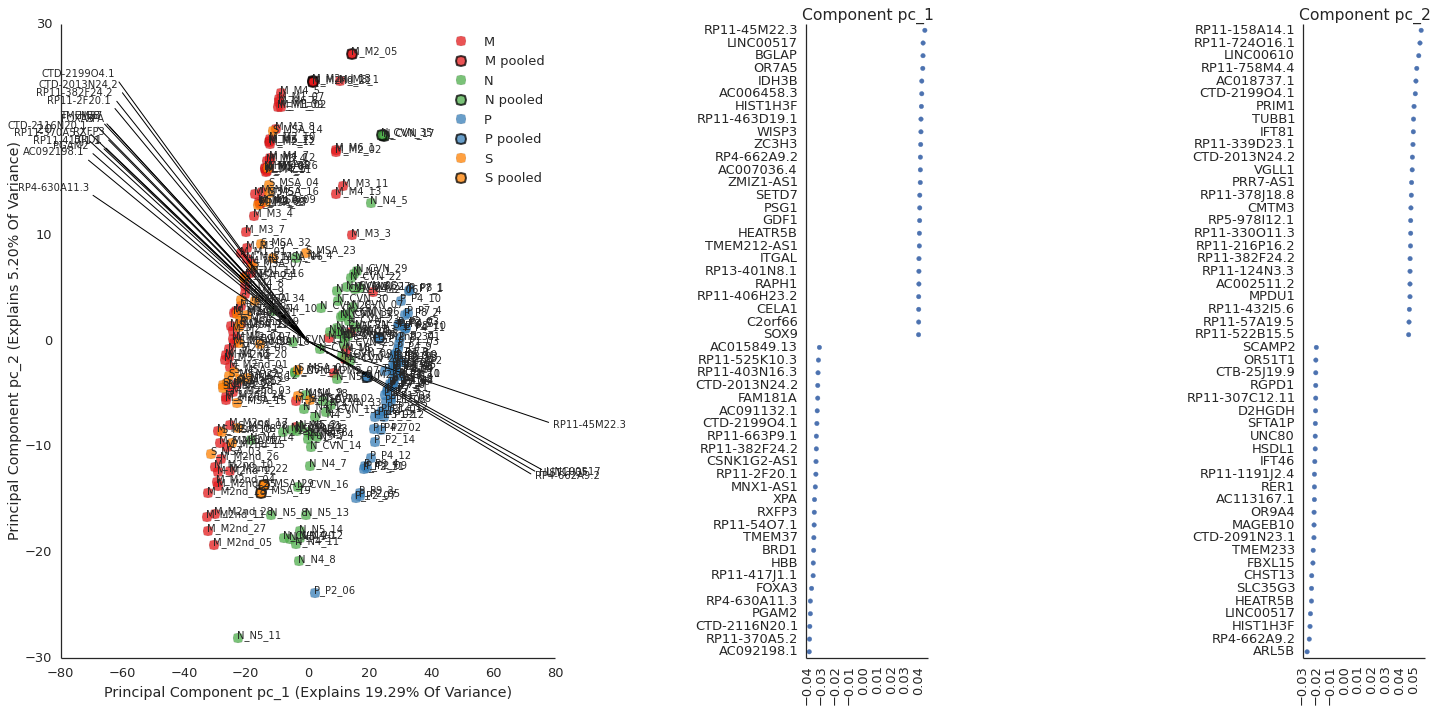

In [36]:
study.interactive_pca(show_point_labels=True);

###Sample P_P2_06 and N_N5_11 look like outliers. Let's remove them.

In [37]:
study.metadata.data.ix[['P_P2_06', 'N_N5_11'], 'outlier'] = True

<a name="negation"></a>
###Use `'not ()'` or "~" to indicate the logical inverse of a column

featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 2.0
most_variant_features : False
show_point_labels : False
plot_violins : False
sample_subset : not (outlier)
feature_subset : variant
bokeh : False
color_samples_by : phenotype
x_pc : 1
list_link : 


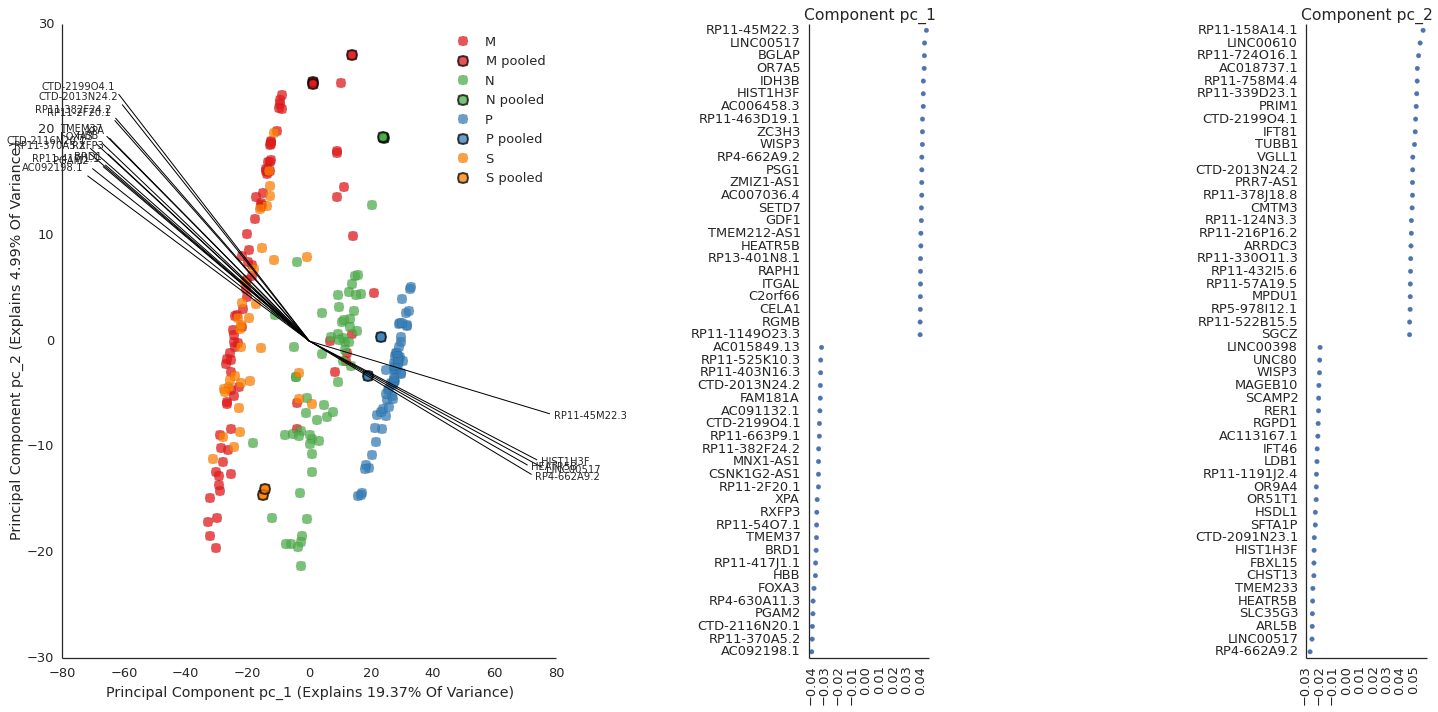

In [38]:
study.interactive_pca(sample_subsets=["not (outlier)"]);

featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 2.0
most_variant_features : False
show_point_labels : False
plot_violins : False
sample_subset : not (P_cell)
feature_subset : gene_type: protein_coding
bokeh : False
color_samples_by : phenotype
x_pc : 1
list_link : 


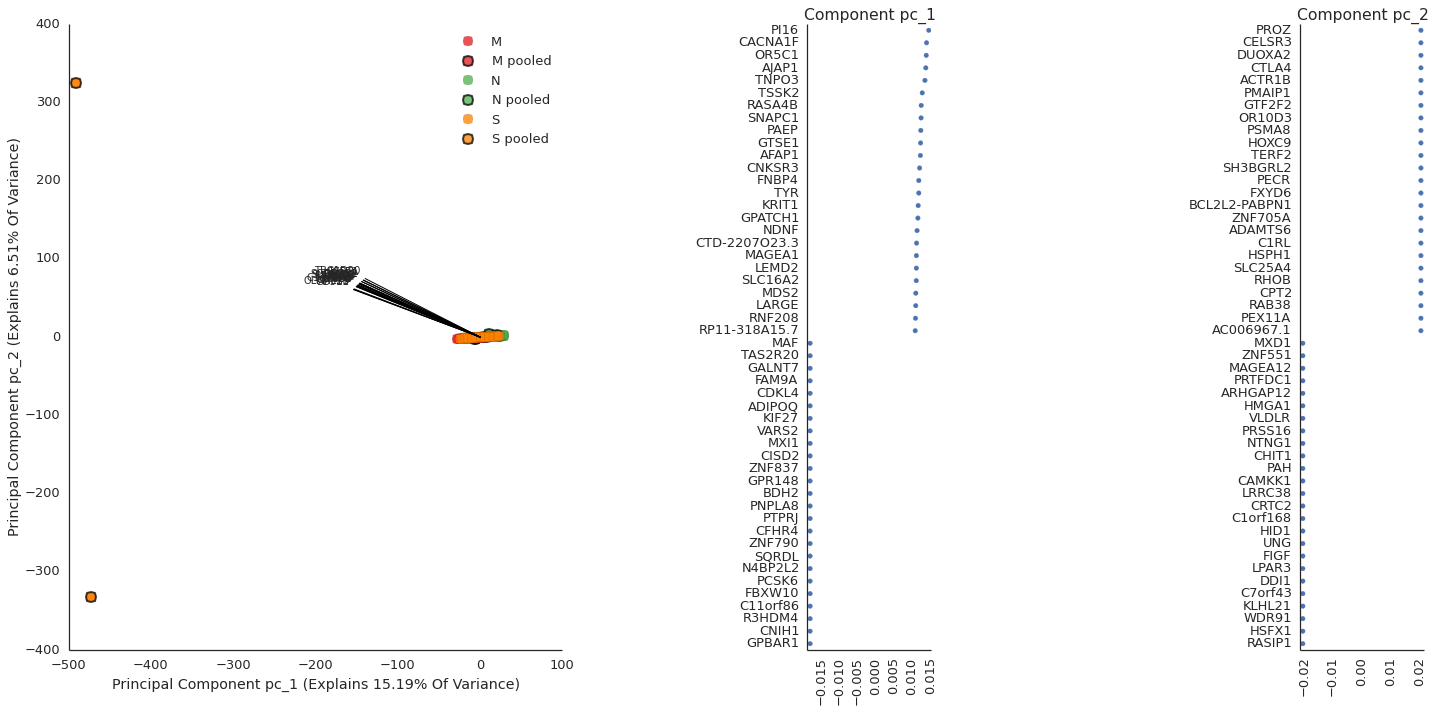

In [39]:
study.interactive_pca(sample_subsets=["not (P_cell)", "not (S_cell)"], 
                      feature_subsets=['gene_type: protein_coding']);

<a name="modify_subsets"></a>
###Make new subsets to plot
#### Get cells that are either P, S or pooled (i.e. only N and M single cells `== False`).


In [40]:
import numpy as np
study.metadata.data['PS_pooled_cells'] = np.any(study.metadata.data.get(['P_cell', 
                                                                               'S_cell',
                                                                               'pooled_samples']), axis=1)

featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 2.0
most_variant_features : False
show_point_labels : False
plot_violins : False
sample_subset : ~PS_pooled_cells
feature_subset : gene_type: protein_coding
bokeh : False
color_samples_by : phenotype
x_pc : 1
list_link : 


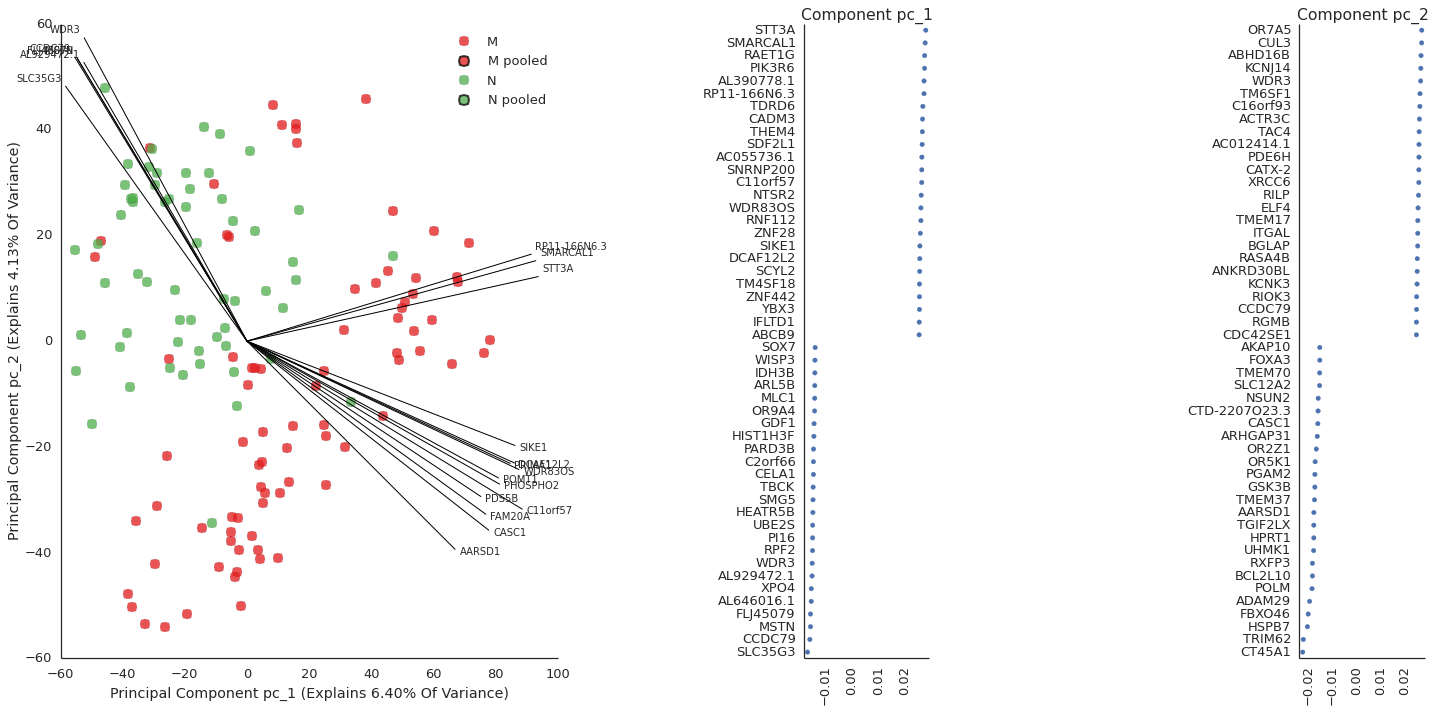

In [41]:
study.interactive_pca(sample_subsets=["~PS_pooled_cells"], 
                      feature_subsets=['gene_type: protein_coding']);

<a name="dropbox"></a>
###Check a gene list from a collaborator.

featurewise : False
y_pc : 2
data_type : expression
std_multiplier : 0.9
most_variant_features : False
show_point_labels : False
plot_violins : False
sample_subset : ~PS_pooled_cells
feature_subset : custom
bokeh : False
color_samples_by : phenotype
x_pc : 1
list_link : https://www.dropbox.com/s/qddybszcses6pi6/DE_genes.male%20adult%20%2019.txt?dl=0
link https://www.dropbox.com/s/qddybszcses6pi6/DE_genes.male%20adult%20%2019.txt?dl=0


WARNING, downloading things from the internet, potential danger from untrusted sources


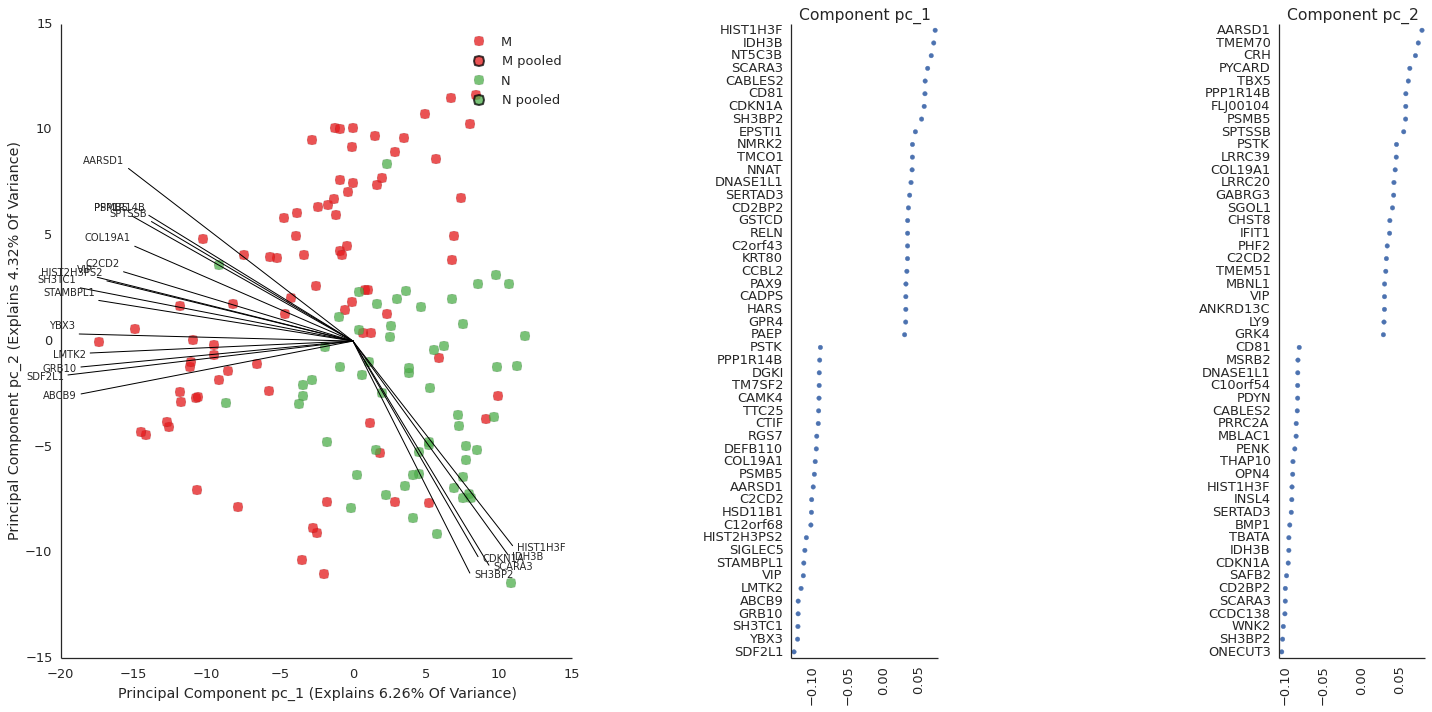

In [42]:
study.interactive_pca(sample_subsets=["~PS_pooled_cells"],
                      feature_subsets=['custom'],
                      list_link="https://www.dropbox.com/s/qddybszcses6pi6/DE_genes.male%20adult%20%2019.txt?dl=0")

##Fit a classifier on interesting sample labels.
Learn important features for the classifier.

##Interactive classifier
###User can control:
  * Sample and feature subsets used for classification<br><br>
  * Categorical variable to classify<br><br>
  * Parameter that selects a cutoff for feature importance from the classifier.<br><br>

###The interactive control widget looks like this:

<img src="img/interactive_classifier_widgets.png" align='left'/>

###Which protein-coding genes best discriminate cell-types?

score_coefficient : 2.0
predictor_type : ExtraTreesClassifier
data_type : expression
show_point_labels : False
sample_subset : all_samples
feature_subset : variant
plot_violins : False
categorical_variable : outlier
2015-01-11 12:24:51 Configuring predictor type: ExtraTreesClassifier with 2093 featuresFitting a predictor for X:all_samples_variant, y:outlier, method:ExtraTreesClassifier... please wait.
	Finished.


[Parallel(n_jobs=2)]: Done   1 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


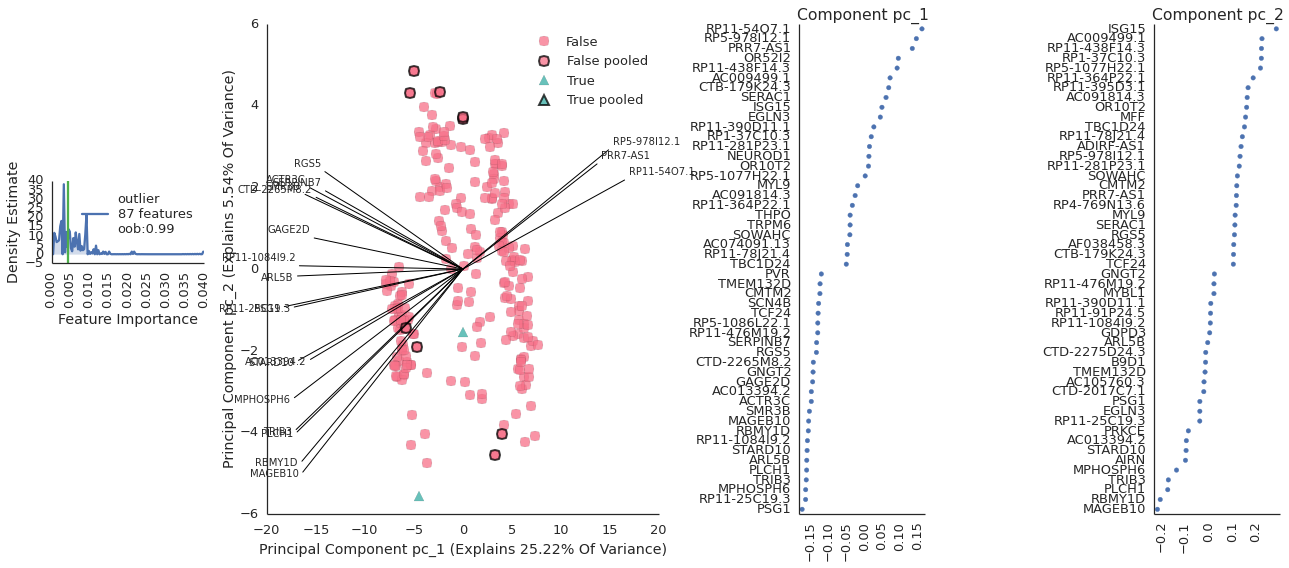

In [44]:
study.interactive_classifier();

###Which RNA-binding proteins best discriminate cell-types?

score_coefficient : 2.0
predictor_type : ExtraTreesClassifier
data_type : expression
show_point_labels : False
sample_subset : all_samples
feature_subset : confident_rbp
plot_violins : False
categorical_variable : phenotype
2015-01-11 12:25:01 Configuring predictor type: ExtraTreesClassifier with 458 features

/usr/local/lib/python2.7/dist-packages/flotilla/compute/predict.py:528: UserWarning: WARNING: trait phenotype has >2 categories
  self.trait_name))
[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    0.0s


Fitting a predictor for X:all_samples_confident_rbp, y:phenotype, method:ExtraTreesClassifier... please wait.
	Finished.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
/usr/local/lib/python2.7/dist-packages/sklearn/ensemble/forest.py:373: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


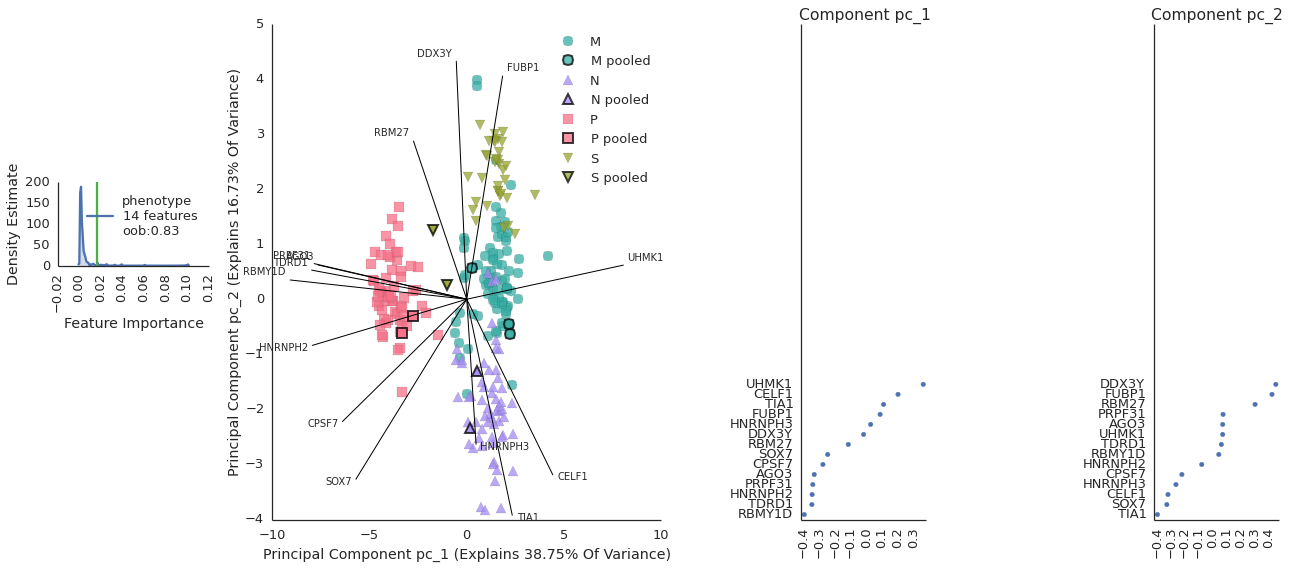

In [45]:
study.interactive_classifier(feature_subsets=['confident_rbp'], 
                             categorical_variables=['phenotype']);

###Which genes respond to sodium arsenite stress in neurons?

In [46]:
import numpy as np
study.metadata.data['MS_cell'] = ~np.any(study.metadata.data.get(['P_cell', 'N_cell', 'pooled_samples']), axis=1)

score_coefficient : 2.0
predictor_type : ExtraTreesClassifier
data_type : expression
show_point_labels : False
sample_subset : MS_cell
feature_subset : gene_type: protein_coding
plot_violins : False
categorical_variable : phenotype
2015-01-11 12:25:13 Configuring predictor type: ExtraTreesClassifier with 20345 featuresFitting a predictor for X:MS_cell_gene_type: protein_coding, y:phenotype, method:ExtraTreesClassifier... please wait.
	Finished.


[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:    1.6s remaining:    4.7s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.6s finished


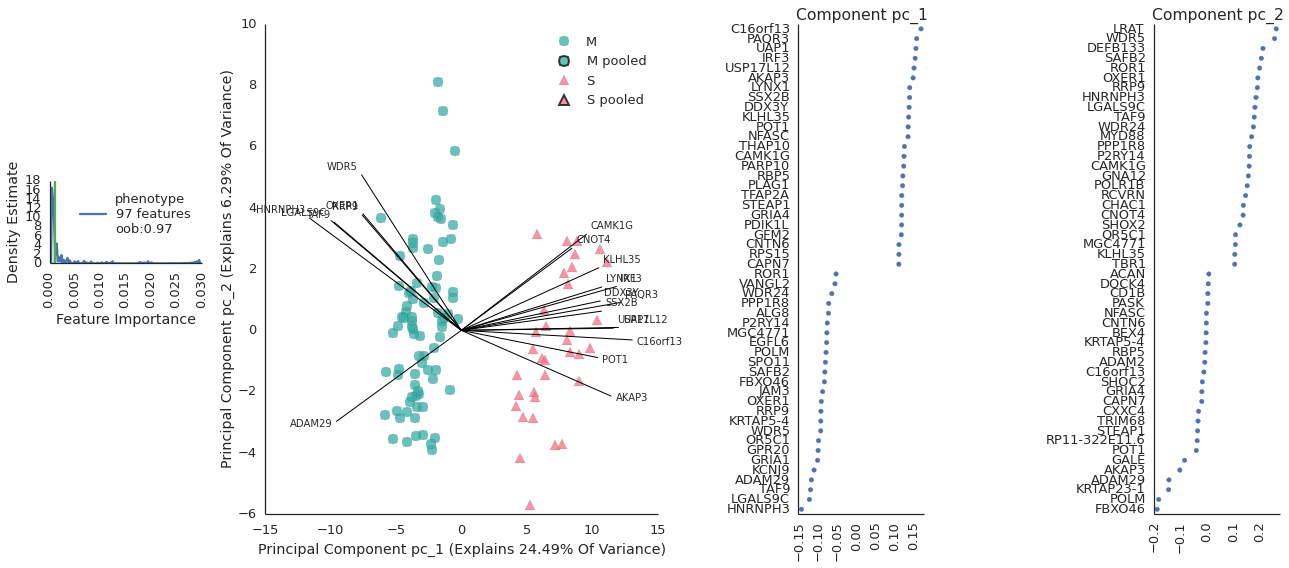

In [47]:
study.interactive_classifier(feature_subsets=['gene_type: protein_coding'], 
                             categorical_variables=['phenotype'],
                             sample_subsets=['MS_cell']);

###Which splicing events discriminate cell types?

score_coefficient : 2.0
predictor_type : ExtraTreesClassifier
data_type : splicing
show_point_labels : False
sample_subset : all_samples
feature_subset : splice_type: SE
plot_violins : False
categorical_variable : phenotype
2015-01-11 12:26:09 Configuring predictor type: ExtraTreesClassifier with 35435 features

[Parallel(n_jobs=4)]: Done   1 out of   4 | elapsed:   14.8s remaining:   44.4s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.9s finished


Fitting a predictor for X:all_samples_splice_type: SE, y:phenotype, method:ExtraTreesClassifier... please wait.
	Finished.


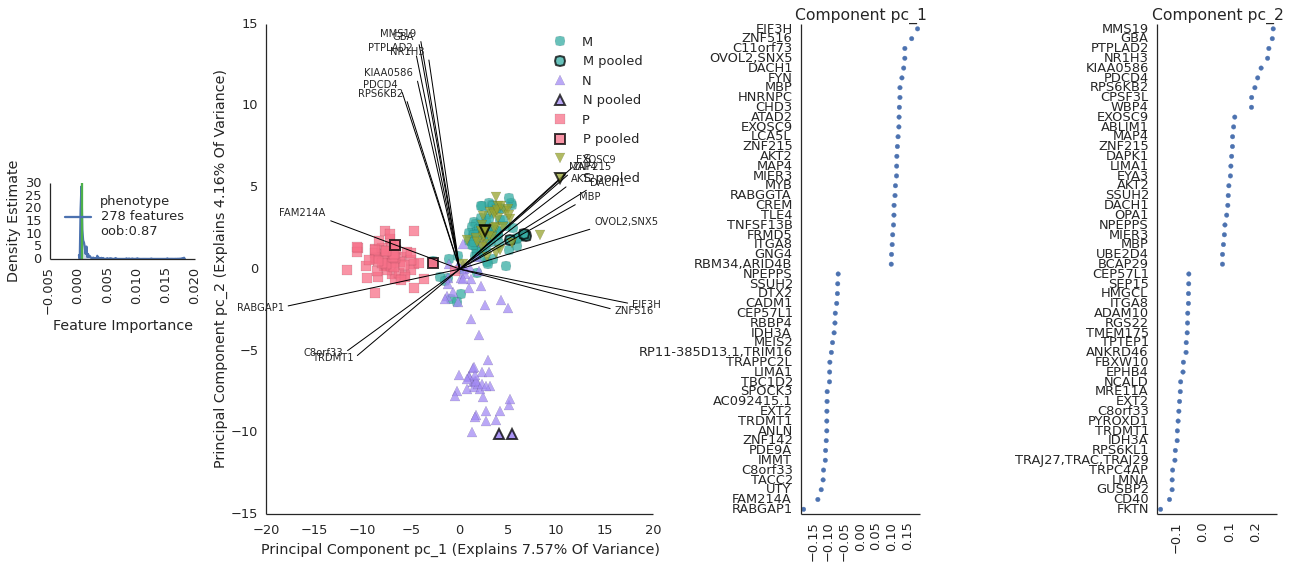

In [48]:
study.interactive_classifier(data_types=['splicing'], 
                             feature_subsets=['splice_type: SE'],
                             categorical_variables=['phenotype']);

#Represent proximity in high-dimensional space with a network graph

##Which samples have the most similar RNA-binding protein gene expression patterns?

featurewise : False
data_type : expression
weight_fun : arctan_sq
use_pc_4 : True
use_pc_2 : True
use_pc_3 : True
sample_subset : all_samples
use_pc_1 : True
cov_std_cut : 1.8
feature_subset : confident_rbp
degree_cut : 1
feature_of_interest : UHMK1
draw_labels : False
n_pcs : 5
'ENSG00000152332'

<function flotilla.visualize.ipython_interact.do_interact>

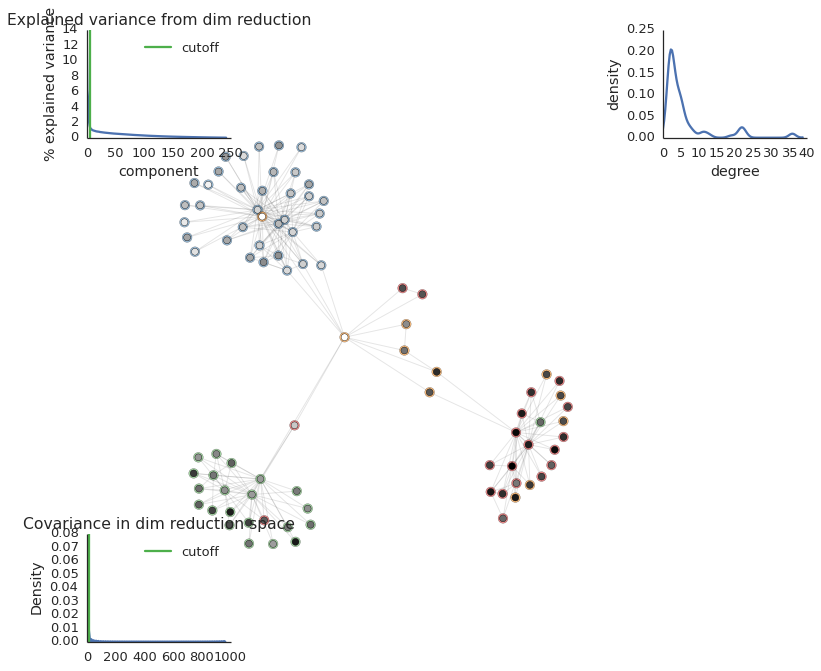

In [57]:
study.interactive_graph(weight_fun=['arctan_sq'],
                        featurewise=False, 
                        feature_subsets=['confident_rbp'],
                        feature_of_interest="UHMK1")

##Which RNA-binding proteins are expressed together?

featurewise : True
data_type : expression
weight_fun : arctan_sq
use_pc_4 : True
use_pc_2 : True
use_pc_3 : True
sample_subset : all_samples
use_pc_1 : True
cov_std_cut : 1.8
feature_subset : confident_rbp
degree_cut : 1
feature_of_interest : UHMK1
draw_labels : False
n_pcs : 5


<function flotilla.visualize.ipython_interact.do_interact>

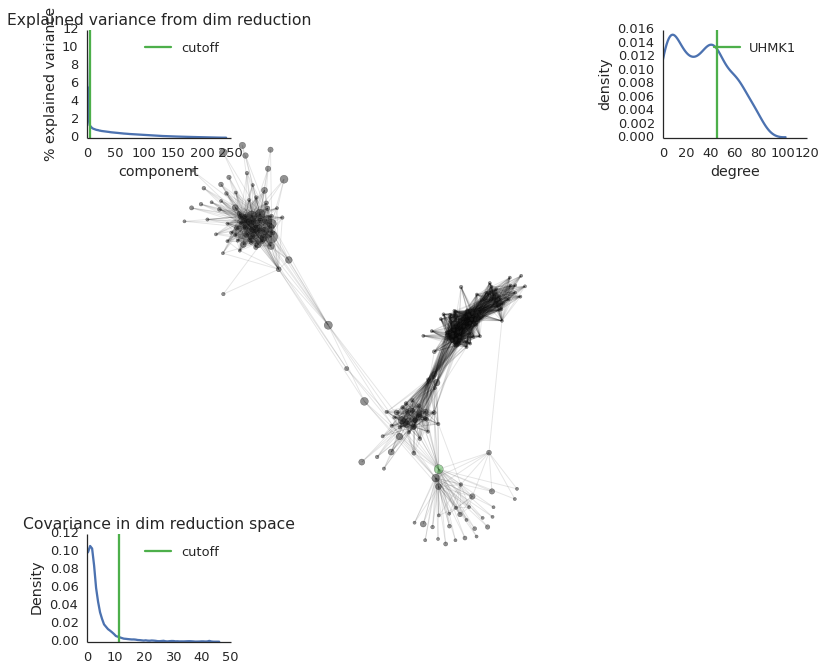

In [58]:
study.interactive_graph(weight_fun=['arctan_sq'], 
                        featurewise=True, 
                        feature_subsets=['confident_rbp'],
                        feature_of_interest="UHMK1")

##Users can use a network representation to visualize proximity of samples or features in high-dimensional space.

data_type : expression
metric : euclidean
sample_subset : all_samples
feature_subset : variant
fig_height : 
scale_fig_by_data : True
fig_width : 
list_link : 
method : average


<function flotilla.visualize.ipython_interact.do_interact>

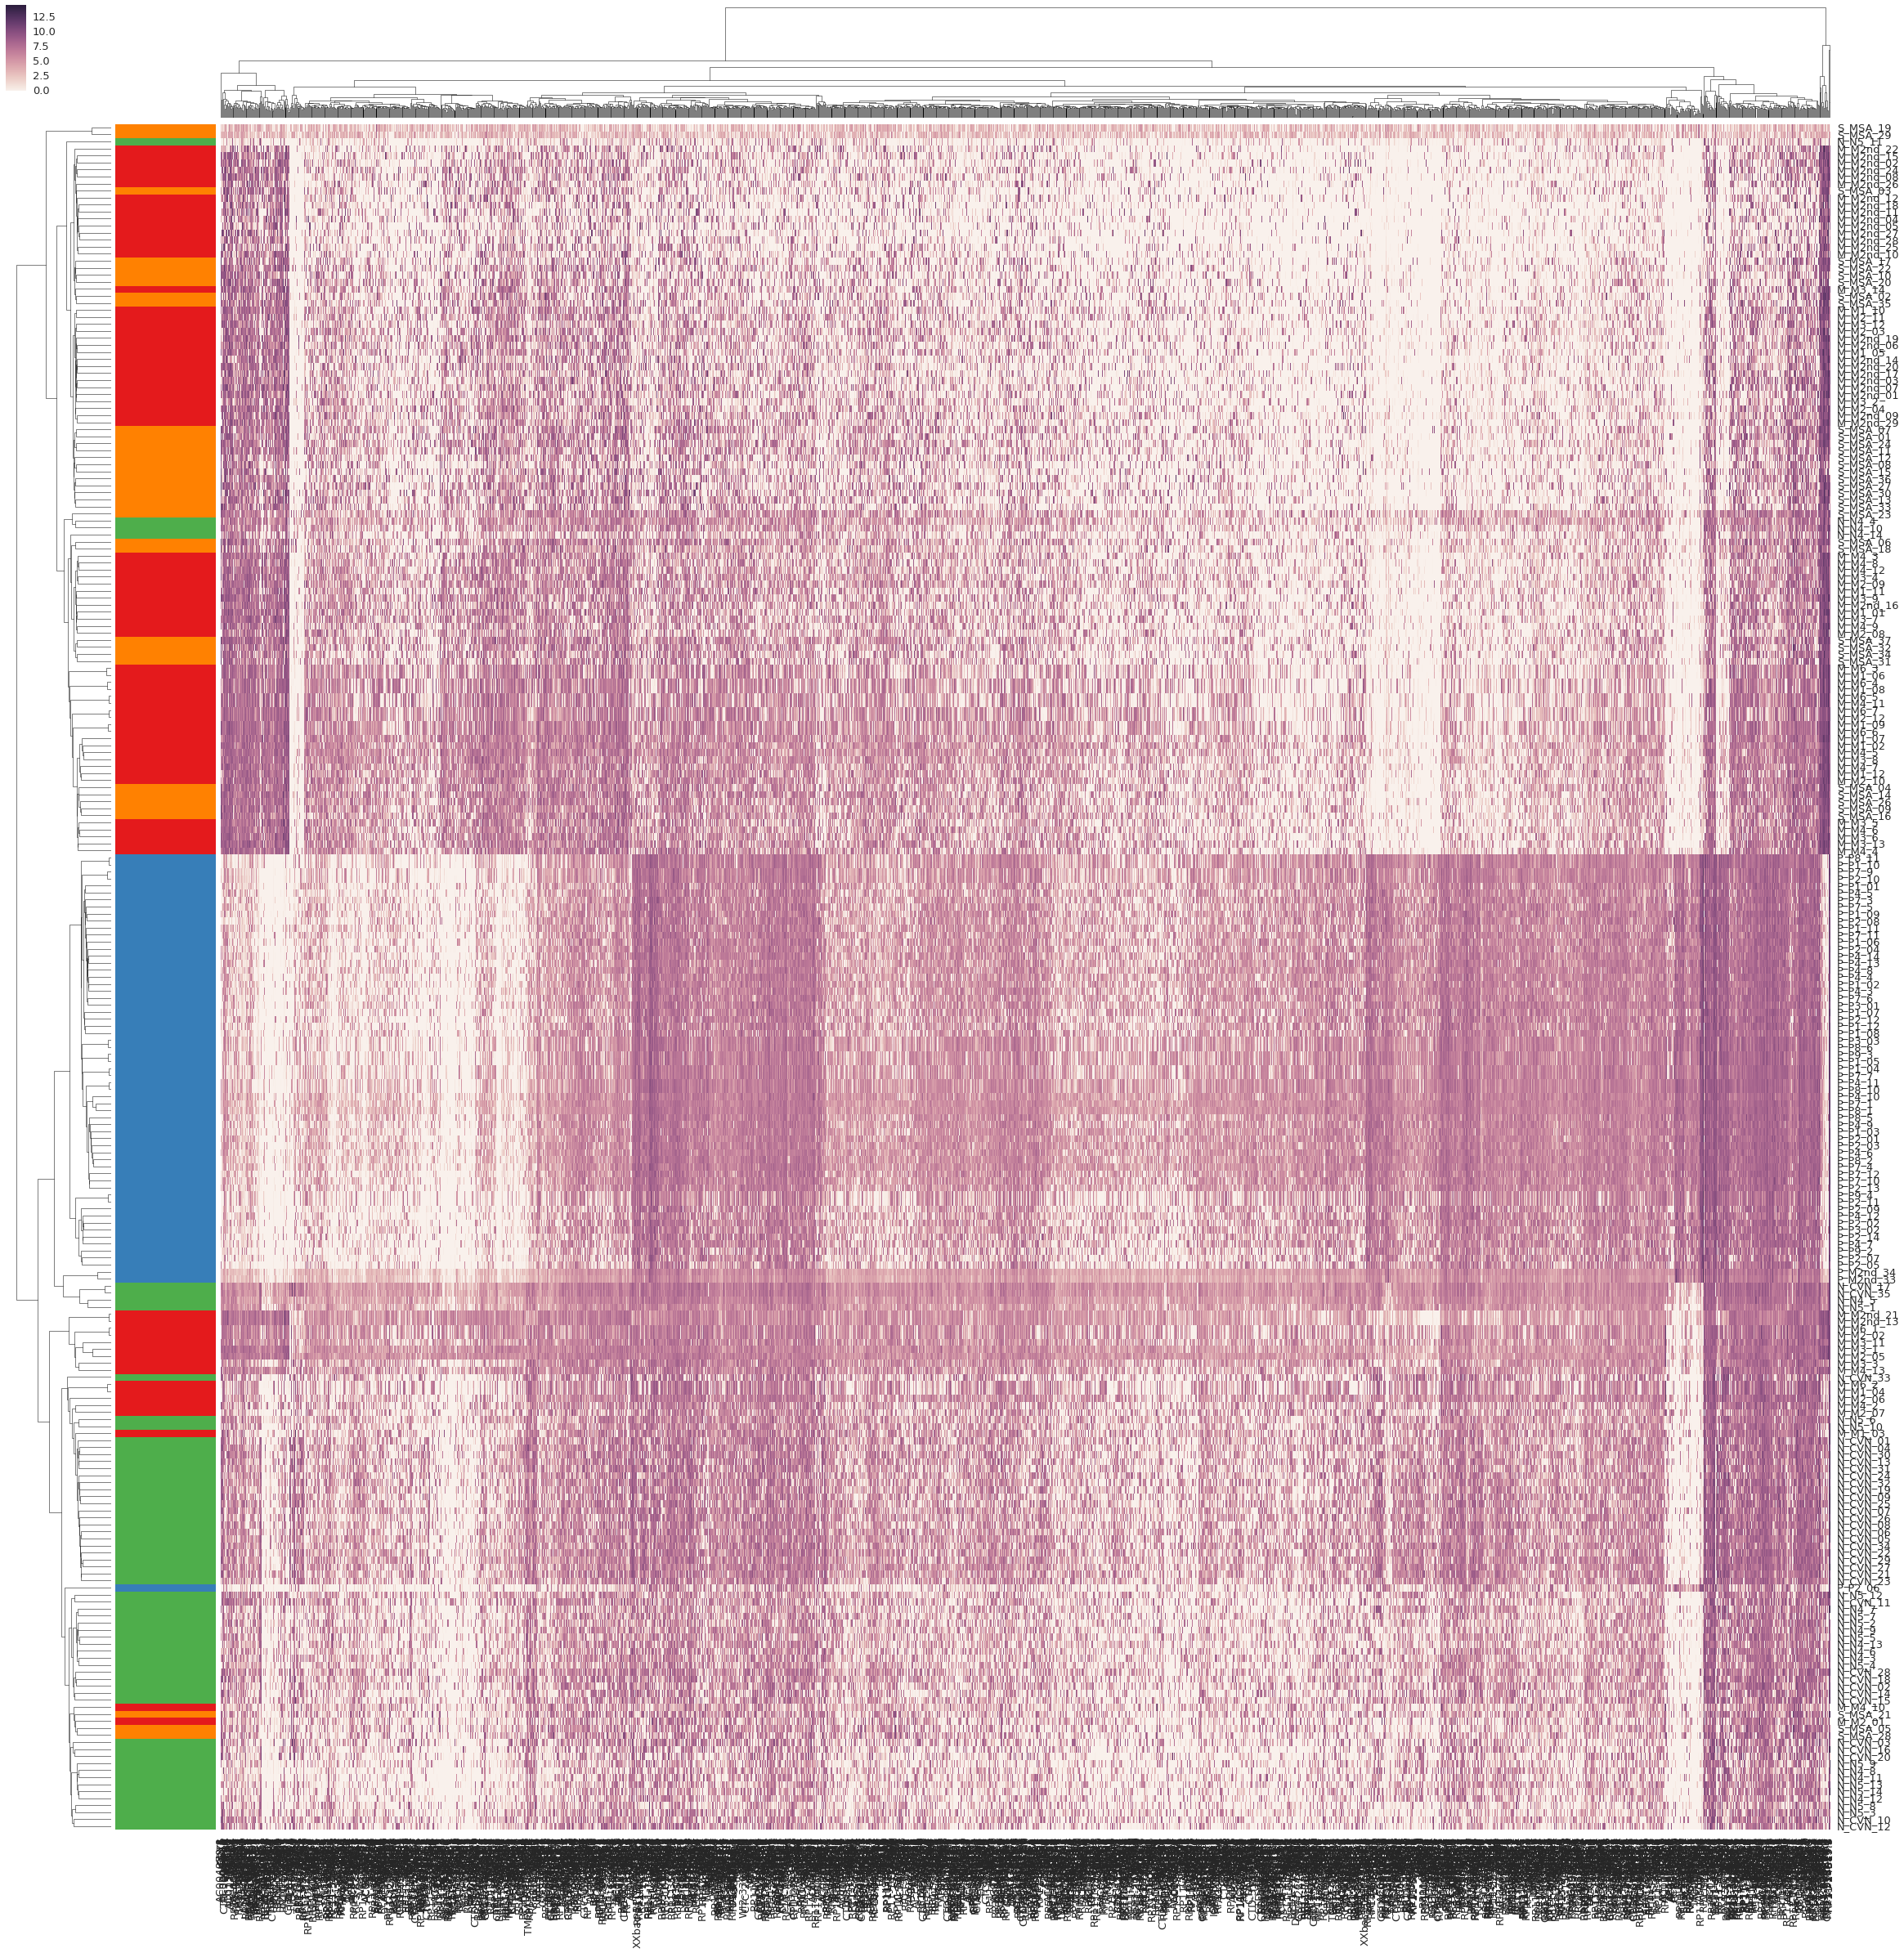

In [63]:
study.interactive_clustermap()

featurewise : False
data_type : expression
metric : euclidean
sample_subset : all_samples
method : average
feature_subset : variant
fig_height : 
scale_fig_by_data : True
list_link : 
fig_width : 


<function flotilla.visualize.ipython_interact.do_interact>

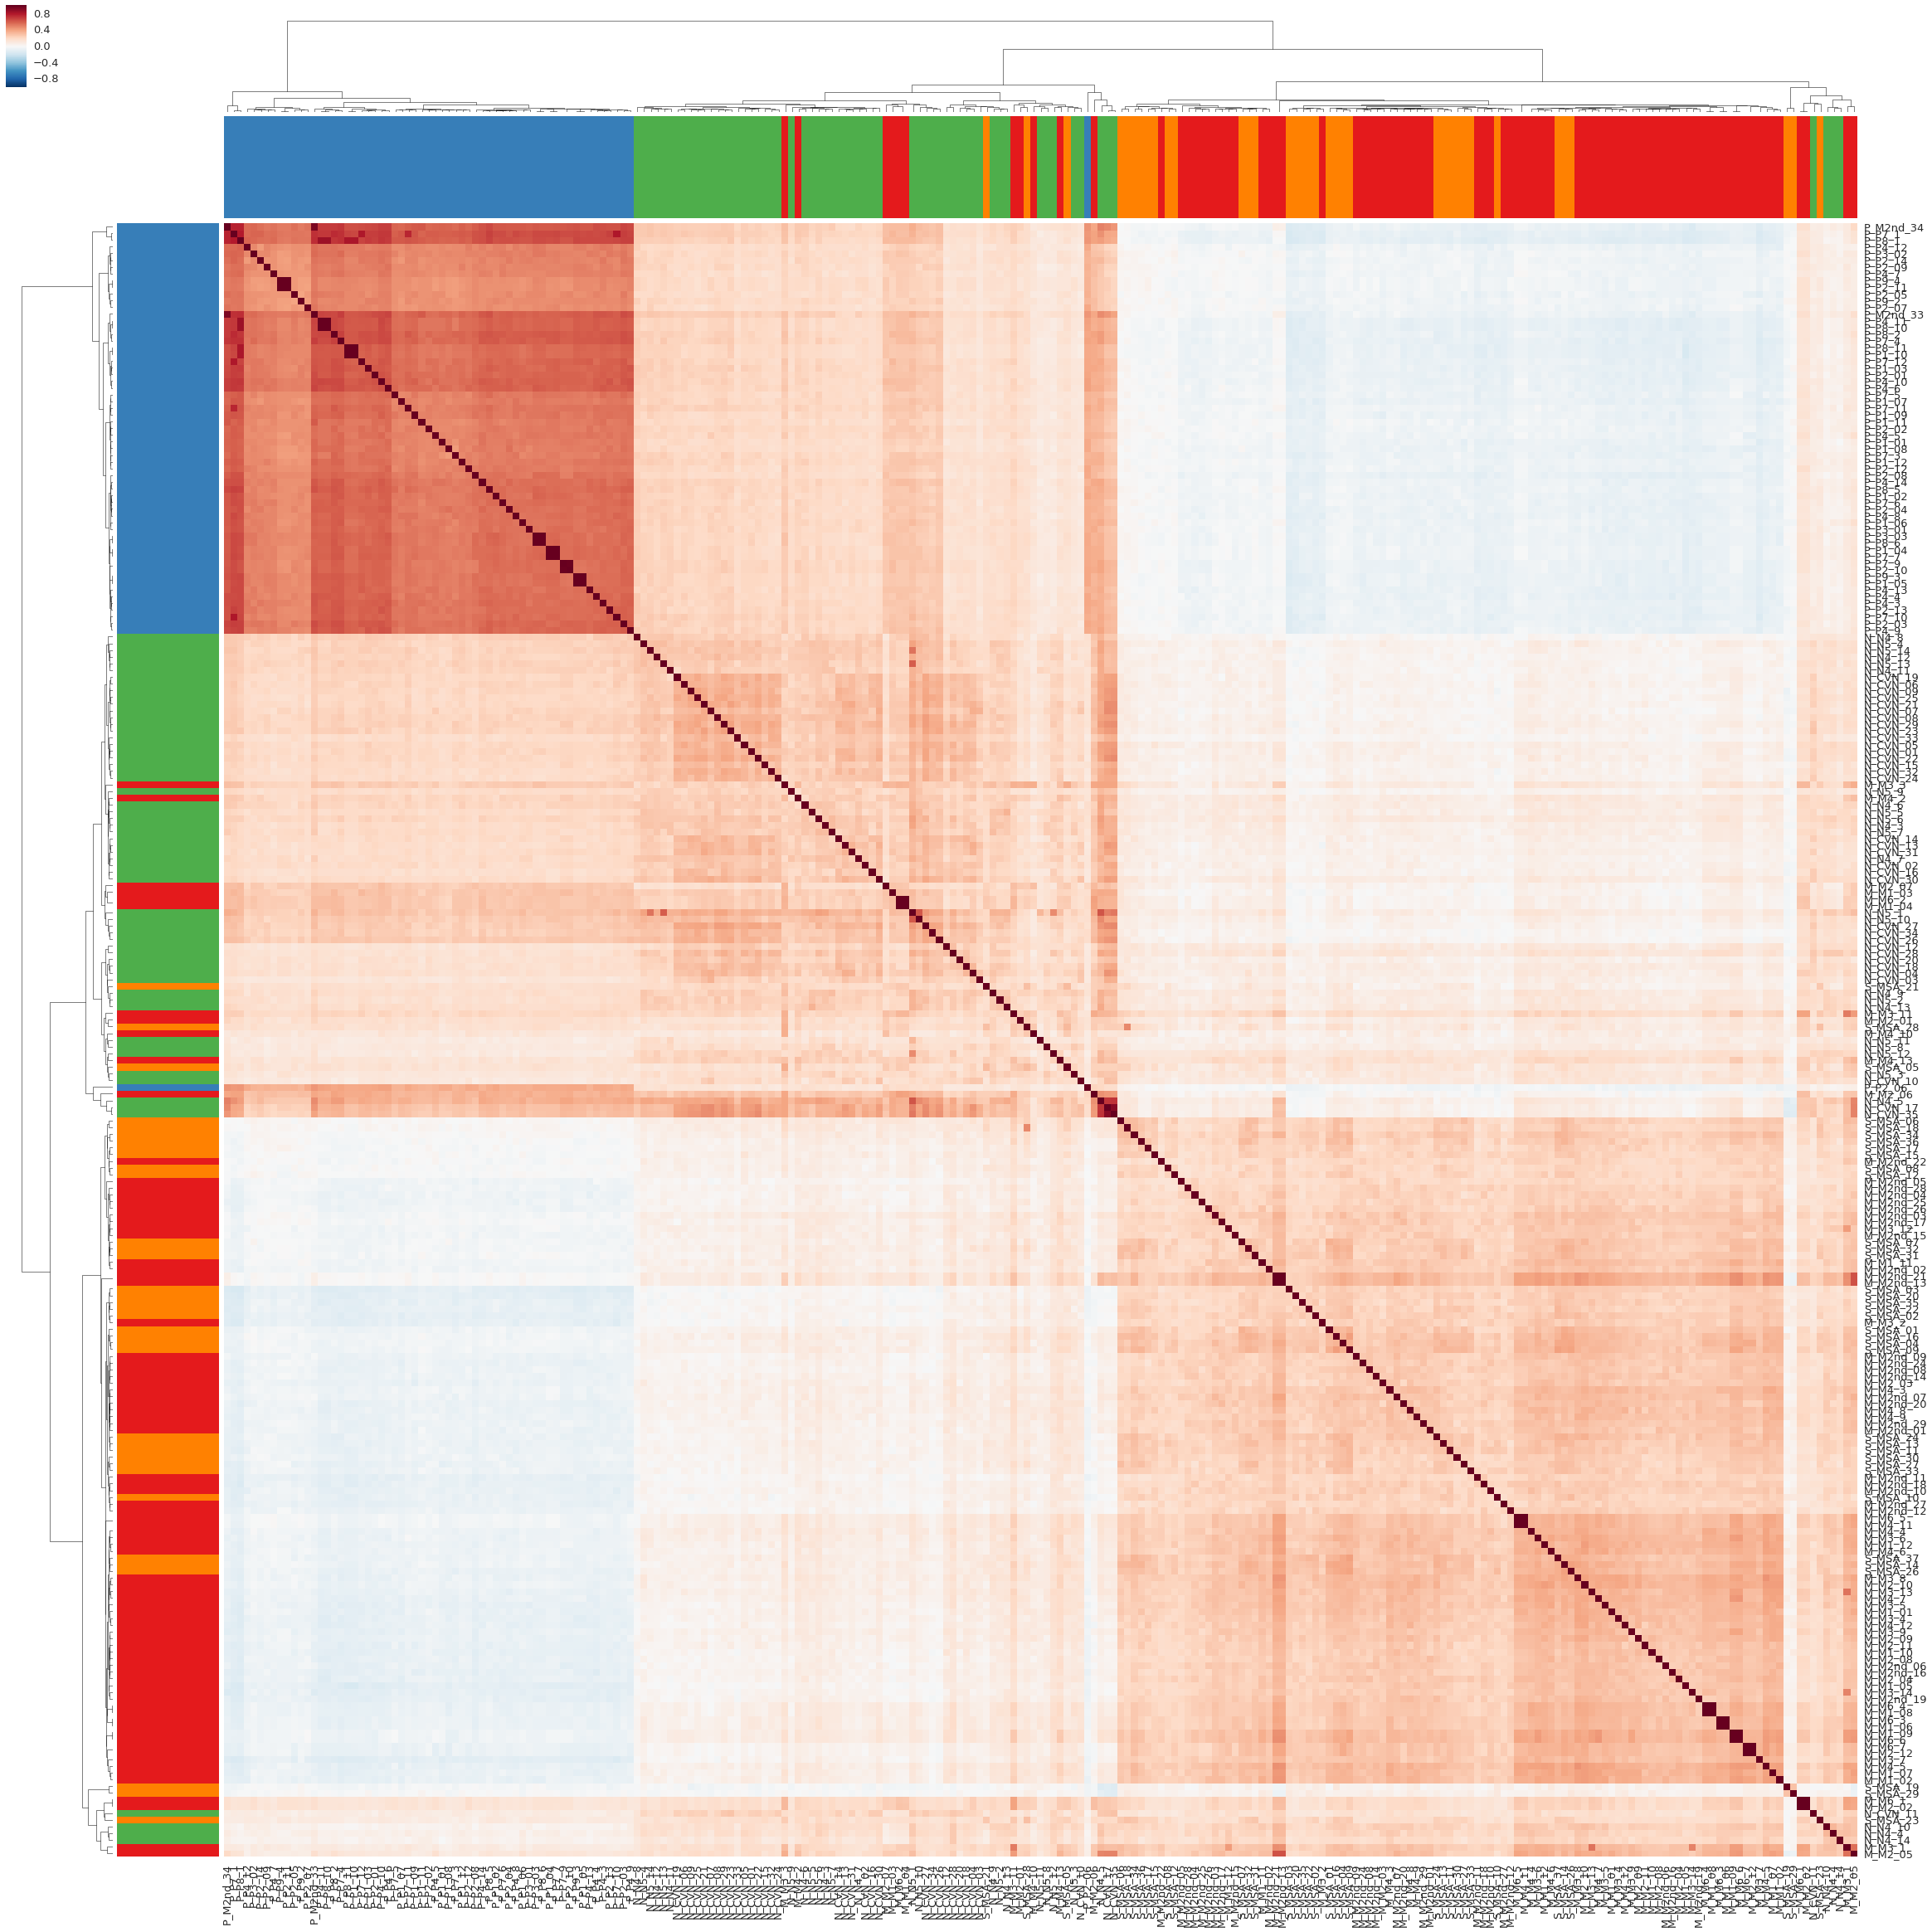

In [68]:
study.interactive_correlations()

##Summary

  With minimal coding users can interact and visualize complex patterns in their data.
  
  Users can:
  
  * Examine expression of interesting genes among phenotypes

  * Modify parameters with interactive HTML widgets

  * Select the inverse of sample subsets

  * Modify sample/feature subsets on the fly

  * Use feature lists from web sources
  
  * Plot dimensionality reduction
  
  * Learn important features from a classifier
  
  * Plot relationships from high-dimensions as a 2D Network graph
  
  * Make sample/Feature Clustergrams
   

##Save data and metadata
To be loaded in other notebooks for analysis.

In [ ]:
study.save("pag_demo")